In [14]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import pymysql
import datetime as dt

In [15]:
pymysql.install_as_MySQLdb()

In [16]:
#Creating dataframes
bitcoin = pd.read_csv('./crypto/bitcoin_price.csv')
ibm = pd.read_csv('./dow/IBM.csv')

ibm.head()

,date,open,high,low,close,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime
0,1/9/2014,158.5454,158.9480,156.4736,157.1698,4322284,4322284,-0.494880,-0.314,157.4492,9-Jan-14,0.000000
1,1/10/2014,157.9499,158.1680,156.2472,157.0692,4023089,4023089,-0.100653,-0.064,156.9879,10-Jan-14,-0.000640
2,1/13/2014,156.2304,156.8092,154.2173,154.4690,5789107,5789107,-2.600200,-1.655,154.8575,13-Jan-14,-0.017184
3,1/14/2014,155.2239,156.3713,154.2356,155.9452,4619509,4619509,1.476200,0.956,155.6201,14-Jan-14,-0.007792
4,1/15/2014,155.8613,158.2351,155.5845,157.4718,4829291,4829291,1.526600,0.979,157.5421,15-Jan-14,0.001921


In [17]:
rds_connection_string = "guest@localhost/etl_project"
engine = create_engine(f'mysql://{rds_connection_string}') 

In [18]:
#Creating Bitcoin and IBM tables under 'etl_project' database in MySQL
bitcoin.to_sql('bitcoin', con=engine, if_exists='replace')
ibm.to_sql('ibm', con=engine, if_exists='replace')

In [19]:
bitcoin_df = bitcoin[['Date','Close','Volume']]
bitcoin_df = bitcoin_df.rename(columns={'Close': 'Bitcoin Close', 'Volume':'Bitcoin Volume'})

ibm_df = ibm[['date','close','volume']]
ibm_df = ibm_df.rename(columns={'date': 'Date', 'close': 'IBM Close', 'volume': 'IBM Volume'})

comparison_df = pd.merge(ibm_df, bitcoin_df, on='Date')
comparison_df

,Date,IBM Close,IBM Volume,Bitcoin Close,Bitcoin Volume
0,1/9/2014,157.1698,4322284,846.86,"59,998,600"
1,1/10/2014,157.0692,4023089,868.48,"31,876,800"
2,1/13/2014,154.4690,5789107,841.20,"45,580,900"
3,1/14/2014,155.9452,4619509,833.27,"20,829,800"
4,1/15/2014,157.4718,4829291,860.90,"28,107,200"
5,1/16/2014,158.3273,4775167,835.63,"19,149,300"
6,1/17/2014,159.4429,7671146,814.64,"39,031,700"
7,1/21/2014,158.0505,11121410,863.91,"18,997,300"
8,1/22/2014,152.8669,13800586,845.59,"18,453,700"
9,1/23/2014,153.2695,6974334,822.04,"15,607,100"


In [20]:
comparison_df.to_sql('ibm_vs_bitcoin', con=engine, if_exists='replace')

In [34]:
sql_df = pd.read_sql('select * from etl_project.ibm_vs_bitcoin', con=engine)

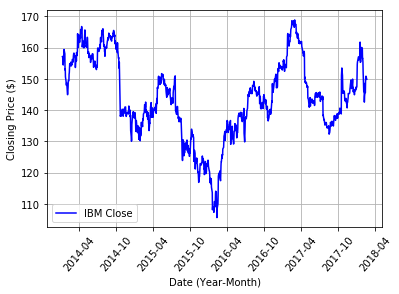

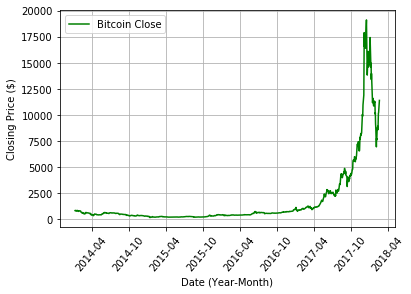

In [51]:
# plt.plot(sql_df['IBM Close'])
# plt.plot(sql_df['Bitcoin Close'])

#1/9/2014
#2/20/2018

#plt.figure(1)
#plt.plot(sql_df['Date'],sql_df['IBM Close'],sql_df['Date'],sql_df['Bitcoin Close'])

dates = sql_df['Date']
x = [dt.datetime.strptime(d, '%m/%d/%Y').date() for d in dates]

plt.figure(1)
plt.plot(x, sql_df['IBM Close'],'b')
plt.xticks(rotation=50)
plt.grid()
plt.xlabel('Date (Year-Month)')
plt.ylabel('Closing Price ($)')
plt.legend()

plt.figure(2)
plt.plot(x, sql_df['Bitcoin Close'],'g')
plt.xticks(rotation=50)
plt.grid()
plt.xlabel('Date (Year-Month)')
plt.ylabel('Closing Price ($)')
plt.legend()

# sql_df.plot(x='Date',y='IBM Close',grid=True)
# plt.ylabel('Close Price')
# sql_df.plot(x='Date',y='Bitcoin Close',grid=True)
# plt.ylabel('Close Price')